# Data Manipulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
df = pd.read_csv('14_24_matches.csv')
df

,Unnamed: 0,date,time,comp,round,day,venue,gf,ga,opponent,poss,attendance,formation,sh,save%,season,team
0,1,2023-08-19,15:30,Bundesliga,Matchweek 1,Sat,Home,3.0,2.0,RB Leipzig,44.0,29464.0,3-4-3,11.0,66.7,2024,Bayer Leverkusen
1,2,2023-08-26,18:30,Bundesliga,Matchweek 2,Sat,Away,3.0,0.0,M'Gladbach,60.0,54042.0,3-4-3,24.0,100.0,2024,Bayer Leverkusen
2,3,2023-09-02,15:30,Bundesliga,Matchweek 3,Sat,Home,5.0,1.0,Darmstadt 98,72.0,29653.0,3-4-3,25.0,0.0,2024,Bayer Leverkusen
3,4,2023-09-15,20:30,Bundesliga,Matchweek 4,Fri,Away,2.0,2.0,Bayern Munich,49.0,75000.0,3-4-3,12.0,77.8,2024,Bayer Leverkusen
4,6,2023-09-24,15:30,Bundesliga,Matchweek 5,Sun,Home,4.0,1.0,Heidenheim,71.0,29557.0,3-4-3,20.0,50.0,2024,Bayer Leverkusen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,30,2015-04-26,15:30,Bundesliga,Matchweek 30,Sun,Home,2.0,2.0,Werder Bremen,39.0,15000.0,4-4-2,18.0,66.7,2015,Paderborn 07
5882,31,2015-05-02,15:30,Bundesliga,Matchweek 31,Sat,Away,2.0,1.0,Freiburg,38.0,24000.0,4-4-2,13.0,80.0,2015,Paderborn 07
5883,32,2015-05-10,15:30,Bundesliga,Matchweek 32,Sun,Home,1.0,3.0,Wolfsburg,52.0,14659.0,4-2-3-1,15.0,40.0,2015,Paderborn 07
5884,33,2015-05-16,15:30,Bundesliga,Matchweek 33,Sat,Away,0.0,1.0,Schalke 04,42.0,61973.0,4-4-2,22.0,66.7,2015,Paderborn 07


In [2]:
df=df.drop('Unnamed: 0', axis = 1)

In [3]:
df.team.value_counts()

team
Bayer Leverkusen       327
Mainz 05               327
Dortmund               327
Eintracht Frankfurt    327
Hoffenheim             327
Augsburg               327
Wolfsburg              327
Monchengladbach        327
Bayern Munich          327
Hertha BSC             306
Freiburg               293
Werder Bremen          293
Koln                   293
Schalke 04             272
Stuttgart              259
RB Leipzig             259
Union Berlin           157
Hannover 96            136
Hamburger SV           136
Darmstadt 98            89
Bochum                  89
Arminia                 68
Dusseldorf              68
Paderborn 07            68
Ingolstadt 04           68
Greuther Furth          34
Nurnberg                34
Heidenheim              21
Name: count, dtype: int64

In [4]:
df.describe()

,gf,ga,poss,attendance,sh,save%,season
count,5886.000000,5886.000000,5886.000000,5142.000000,5886.000000,5723.000000,5886.000000
mean,1.502548,1.502548,50.014441,39885.478024,12.807170,69.309593,2019.321101
std,1.322793,1.322793,11.547058,19169.814983,5.153846,26.095315,2.782489
min,0.000000,0.000000,16.000000,100.000000,0.000000,-100.000000,2015.000000
25%,1.000000,1.000000,42.000000,25800.000000,9.000000,50.000000,2017.000000
50%,1.000000,1.000000,50.000000,38438.000000,12.000000,71.400000,2019.000000
75%,2.000000,2.000000,58.000000,51500.000000,16.000000,100.000000,2022.000000
max,8.000000,8.000000,85.000000,81365.000000,37.000000,100.000000,2024.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        5886 non-null   object 
 1   time        5886 non-null   object 
 2   comp        5886 non-null   object 
 3   round       5886 non-null   object 
 4   day         5886 non-null   object 
 5   venue       5886 non-null   object 
 6   gf          5886 non-null   float64
 7   ga          5886 non-null   float64
 8   opponent    5886 non-null   object 
 9   poss        5886 non-null   float64
 10  attendance  5142 non-null   float64
 11  formation   5886 non-null   object 
 12  sh          5886 non-null   float64
 13  save%       5723 non-null   float64
 14  season      5886 non-null   int64  
 15  team        5886 non-null   object 
dtypes: float64(6), int64(1), object(9)
memory usage: 735.9+ KB


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df['total_goal'] = df['gf'] + df['ga']

In [8]:
grouped_matches = df.groupby("team")
group = grouped_matches.get_group("Arminia").sort_values("date")
group

,date,time,comp,round,day,venue,gf,ga,opponent,poss,attendance,formation,sh,save%,season,team,total_goal
2078,2020-09-19,15:30,Bundesliga,Matchweek 1,Sat,Away,1.0,1.0,Eint Frankfurt,38.0,6500.0,4-1-4-1,12.0,83.3,2021,Arminia,2.0
2079,2020-09-26,15:30,Bundesliga,Matchweek 2,Sat,Home,1.0,0.0,Köln,47.0,5460.0,4-3-3,7.0,100.0,2021,Arminia,1.0
2080,2020-10-03,15:30,Bundesliga,Matchweek 3,Sat,Away,0.0,1.0,Werder Bremen,62.0,300.0,4-2-3-1,9.0,50.0,2021,Arminia,1.0
2081,2020-10-17,18:30,Bundesliga,Matchweek 4,Sat,Home,1.0,4.0,Bayern Munich,34.0,NaN,4-2-3-1,11.0,55.6,2021,Arminia,5.0
2082,2020-10-25,15:30,Bundesliga,Matchweek 5,Sun,Away,1.0,2.0,Wolfsburg,52.0,4519.0,4-2-3-1,9.0,50.0,2021,Arminia,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2022-04-17,15:30,Bundesliga,Matchweek 30,Sun,Home,0.0,3.0,Bayern Munich,25.0,26419.0,4-2-3-1,8.0,62.5,2022,Arminia,3.0
1564,2022-04-23,15:30,Bundesliga,Matchweek 31,Sat,Away,1.0,3.0,Köln,45.0,50000.0,4-4-2,13.0,50.0,2022,Arminia,4.0
1565,2022-04-30,15:30,Bundesliga,Matchweek 32,Sat,Home,1.0,1.0,Hertha BSC,55.0,26021.0,4-2-3-1,7.0,80.0,2022,Arminia,2.0
1566,2022-05-06,20:30,Bundesliga,Matchweek 33,Fri,Away,1.0,2.0,Bochum,40.0,25000.0,4-4-2,14.0,77.8,2022,Arminia,3.0


In [9]:
# average of the last 3 games
def rolling_averages(group, cols_1, cols_2, new_cols_1, new_cols_2):
    group = group.sort_values("date")
    rolling_stats = group[cols_1].rolling(3, closed='left').mean()
    previous_stats = group[cols_2].rolling(1, closed='left').mean()
    group[new_cols_1] = rolling_stats
    group[new_cols_2] = previous_stats
    #group = group.dropna(subset=new_cols)
    return group

In [10]:
cols_1 = ["gf",'ga','poss','sh', 'save%','attendance','total_goal']
new_cols_1 = [f"{c}_rolling" for c in cols_1] 

cols_2 = []
new_cols_2 = [f"{c}_last_game" for c in cols_2]

rolling_averages(group, cols_1, cols_2, new_cols_1, new_cols_2)

,date,time,comp,round,day,venue,gf,ga,opponent,poss,...,season,team,total_goal,gf_rolling,ga_rolling,poss_rolling,sh_rolling,save%_rolling,attendance_rolling,total_goal_rolling
2078,2020-09-19,15:30,Bundesliga,Matchweek 1,Sat,Away,1.0,1.0,Eint Frankfurt,38.0,...,2021,Arminia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-09-26,15:30,Bundesliga,Matchweek 2,Sat,Home,1.0,0.0,Köln,47.0,...,2021,Arminia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2080,2020-10-03,15:30,Bundesliga,Matchweek 3,Sat,Away,0.0,1.0,Werder Bremen,62.0,...,2021,Arminia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,2020-10-17,18:30,Bundesliga,Matchweek 4,Sat,Home,1.0,4.0,Bayern Munich,34.0,...,2021,Arminia,5.0,0.666667,0.666667,49.000000,9.333333,77.766667,4086.666667,1.333333
2082,2020-10-25,15:30,Bundesliga,Matchweek 5,Sun,Away,1.0,2.0,Wolfsburg,52.0,...,2021,Arminia,3.0,0.666667,1.666667,47.666667,9.000000,68.533333,NaN,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2022-04-17,15:30,Bundesliga,Matchweek 30,Sun,Home,0.0,3.0,Bayern Munich,25.0,...,2022,Arminia,3.0,0.333333,3.000000,48.000000,7.666667,72.200000,24507.666667,3.333333
1564,2022-04-23,15:30,Bundesliga,Matchweek 31,Sat,Away,1.0,3.0,Köln,45.0,...,2022,Arminia,4.0,0.333333,2.666667,41.666667,8.333333,65.266667,24980.666667,3.000000
1565,2022-04-30,15:30,Bundesliga,Matchweek 32,Sat,Home,1.0,1.0,Hertha BSC,55.0,...,2022,Arminia,2.0,0.333333,3.333333,39.000000,9.333333,48.600000,32977.000000,3.666667
1566,2022-05-06,20:30,Bundesliga,Matchweek 33,Fri,Away,1.0,2.0,Bochum,40.0,...,2022,Arminia,3.0,0.666667,2.333333,41.666667,9.333333,64.166667,34146.666667,3.000000


In [11]:
matches_rolling = grouped_matches.apply(lambda x: rolling_averages(x, cols_1, cols_2, new_cols_1, new_cols_2))
matches_rolling

C:\Users\tramn\AppData\Local\Temp\ipykernel_10640\4079690380.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = grouped_matches.apply(lambda x: rolling_averages(x, cols_1, cols_2, new_cols_1, new_cols_2))


date   time        comp         round  day venue   gf  \
team                                                                         
Arminia   2078 2020-09-19  15:30  Bundesliga   Matchweek 1  Sat  Away  1.0   
          2079 2020-09-26  15:30  Bundesliga   Matchweek 2  Sat  Home  1.0   
          2080 2020-10-03  15:30  Bundesliga   Matchweek 3  Sat  Away  0.0   
          2081 2020-10-17  18:30  Bundesliga   Matchweek 4  Sat  Home  1.0   
          2082 2020-10-25  15:30  Bundesliga   Matchweek 5  Sun  Away  1.0   
...                   ...    ...         ...           ...  ...   ...  ...   
Wolfsburg 247  2024-01-13  15:30  Bundesliga  Matchweek 17  Sat  Away  1.0   
          248  2024-01-20  15:30  Bundesliga  Matchweek 18  Sat  Away  1.0   
          249  2024-01-27  15:30  Bundesliga  Matchweek 19  Sat  Home  1.0   
          250  2024-02-04  15:30  Bundesliga  Matchweek 20  Sun  Home  2.0   
          251  2024-02-10  15:30  Bundesliga  Matchweek 21  Sat  Away  0.0   

                 ga        opponent  poss  ...  season       team  total_goal  \
team                                       ...                                  
Arminia   2078  1.0  Eint Frankfurt  38.0  ...    2021    Arminia         2.0   
          2079  0.0            Köln  47.0  ...    2021    Arminia         1.0   
          2080  1.0   Werder Bremen  62.0  ...    2021    Arminia         1.0   
          2081  4.0   Bayern Munich  34.0  ...    2021    Arminia         5.0   
          2082  2.0       Wolfsburg  52.0  ...    2021    Arminia         3.0   
...             ...             ...   ...  ...     ...        ...         ...   
Wolfsburg 247   1.0        Mainz 05  48.0  ...    2024  Wolfsburg         2.0   
          248   1.0      Heidenheim  47.0  ...    2024  Wolfsburg         2.0   
          249   1.0            Köln  52.0  ...    2024  Wolfsburg         2.0   
          250   2.0      Hoffenheim  45.0  ...    2024  Wolfsburg         4.0   
          251   1.0    Union Berlin  58.0  ...    2024  Wolfsburg         1.0   

                gf_rolling  ga_rolling poss_rolling  sh_rolling  \
team                                                              
Arminia   2078         NaN         NaN          NaN         NaN   
          2079         NaN         NaN          NaN         NaN   
          2080         NaN         NaN          NaN         NaN   
          2081    0.666667    0.666667    49.000000    9.333333   
          2082    0.666667    1.666667    47.666667    9.000000   
...                    ...         ...          ...         ...   
Wolfsburg 247     0.666667    1.000000    44.666667    8.666667   
          248     1.000000    1.000000    41.333333    8.333333   
          249     1.000000    1.333333    44.666667    9.000000   
          250     1.000000    1.000000    49.000000   12.000000   
          251     1.333333    1.333333    48.000000   13.333333   

                save%_rolling  attendance_rolling  total_goal_rolling  
team                                                                   
Arminia   2078            NaN                 NaN                 NaN  
          2079            NaN                 NaN                 NaN  
          2080            NaN                 NaN                 NaN  
          2081      77.766667         4086.666667            1.333333  
          2082      68.533333                 NaN            2.333333  
...                       ...                 ...                 ...  
Wolfsburg 247       57.133333        21987.666667            1.666667  
          248       73.800000        23272.333333            2.000000  
          249       62.700000        22639.000000            2.333333  
          250       55.566667        21175.000000            2.000000  
          251       62.700000        20814.000000            2.666667  

[5886 rows x 24 columns]

In [12]:
matches_rolling.index = matches_rolling.index.droplevel()
matches_rolling

,date,time,comp,round,day,venue,gf,ga,opponent,poss,...,season,team,total_goal,gf_rolling,ga_rolling,poss_rolling,sh_rolling,save%_rolling,attendance_rolling,total_goal_rolling
2078,2020-09-19,15:30,Bundesliga,Matchweek 1,Sat,Away,1.0,1.0,Eint Frankfurt,38.0,...,2021,Arminia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-09-26,15:30,Bundesliga,Matchweek 2,Sat,Home,1.0,0.0,Köln,47.0,...,2021,Arminia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2080,2020-10-03,15:30,Bundesliga,Matchweek 3,Sat,Away,0.0,1.0,Werder Bremen,62.0,...,2021,Arminia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,2020-10-17,18:30,Bundesliga,Matchweek 4,Sat,Home,1.0,4.0,Bayern Munich,34.0,...,2021,Arminia,5.0,0.666667,0.666667,49.000000,9.333333,77.766667,4086.666667,1.333333
2082,2020-10-25,15:30,Bundesliga,Matchweek 5,Sun,Away,1.0,2.0,Wolfsburg,52.0,...,2021,Arminia,3.0,0.666667,1.666667,47.666667,9.000000,68.533333,NaN,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-01-13,15:30,Bundesliga,Matchweek 17,Sat,Away,1.0,1.0,Mainz 05,48.0,...,2024,Wolfsburg,2.0,0.666667,1.000000,44.666667,8.666667,57.133333,21987.666667,1.666667
248,2024-01-20,15:30,Bundesliga,Matchweek 18,Sat,Away,1.0,1.0,Heidenheim,47.0,...,2024,Wolfsburg,2.0,1.000000,1.000000,41.333333,8.333333,73.800000,23272.333333,2.000000
249,2024-01-27,15:30,Bundesliga,Matchweek 19,Sat,Home,1.0,1.0,Köln,52.0,...,2024,Wolfsburg,2.0,1.000000,1.333333,44.666667,9.000000,62.700000,22639.000000,2.333333
250,2024-02-04,15:30,Bundesliga,Matchweek 20,Sun,Home,2.0,2.0,Hoffenheim,45.0,...,2024,Wolfsburg,4.0,1.000000,1.000000,49.000000,12.000000,55.566667,21175.000000,2.000000


In [13]:
matches_rolling.team.unique()

array(['Arminia', 'Augsburg', 'Bayer Leverkusen', 'Bayern Munich',
       'Bochum', 'Darmstadt 98', 'Dortmund', 'Dusseldorf',
       'Eintracht Frankfurt', 'Freiburg', 'Greuther Furth',
       'Hamburger SV', 'Hannover 96', 'Heidenheim', 'Hertha BSC',
       'Hoffenheim', 'Ingolstadt 04', 'Koln', 'Mainz 05',
       'Monchengladbach', 'Nurnberg', 'Paderborn 07', 'RB Leipzig',
       'Schalke 04', 'Stuttgart', 'Union Berlin', 'Werder Bremen',
       'Wolfsburg'], dtype=object)

In [14]:
matches_rolling.opponent.unique()

array(['Eint Frankfurt', 'Köln', 'Werder Bremen', 'Bayern Munich',
       'Wolfsburg', 'Dortmund', 'Union Berlin', 'Leverkusen',
       'RB Leipzig', 'Mainz 05', 'Freiburg', 'Augsburg', 'Schalke 04',
       "M'Gladbach", 'Hertha BSC', 'Hoffenheim', 'Stuttgart',
       'Greuther Fürth', 'Bochum', 'Paderborn 07', 'Hamburger SV',
       'Hannover 96', 'Ingolstadt 04', 'Darmstadt 98', 'Düsseldorf',
       'Nürnberg', 'Arminia', 'Heidenheim'], dtype=object)

In [15]:
matches_rolling.opponent.nunique()

28

In [16]:
# rename and match the teams name of home team and opponent team columns
Team_name = {
    'Arminia':'Arminia',
    'Augsburg':'Augsburg',
    'Bayer Leverkusen': 'Bayer Leverkusen',
    'Bayern Munich':'Bayern Munich',
    'Bochum':'Bochum',
    'Darmstadt 98':'Darmstadt 98',
    'Dortmund':'Dortmund',
    'Eintracht Frankfurt': 'Eintracht Frankfurt',
    'Freiburg': 'Freiburg',
    'Greuther Furth': 'Greuther Fürth',
    'Heidenheim': 'Heidenheim',
    'Hertha BSC': 'Hertha BSC',
    'Hoffenheim': 'Hoffenheim',
    'Koln': 'Köln',
    'Mainz 05':'Mainz 05',
    'Monchengladbach': 'Monchengladbach',
    'RB Leipzig':'RB Leipzig',
    'Schalke 04': 'Schalke 04',
    'Stuttgart': 'Stuttgart',
    'Union Berlin': 'Union Berlin',
    'Werder Bremen': 'Werder Bremen',
    'Wolfsburg': 'Wolfsburg',
    'Dusseldorf': 'Düsseldorf',
    'Hamburger SV': 'Hamburger SV',
    'Paderborn 07': 'Paderborn 07',
    'Hannover 96': 'Hannover 96',
    'Nurnberg': 'Nürnberg',
    'Ingolstadt 04':'Ingolstadt 04',
    'Eintracht Braunschweig': 'Eintracht Braunschweig'
}
Opponent_name = {
    'Arminia':'Arminia',
    'Augsburg':'Augsburg',
    'Leverkusen': 'Bayer Leverkusen',
    'Bayern Munich':'Bayern Munich',
    'Bochum':'Bochum',
    'Darmstadt 98':'Darmstadt 98',
    'Dortmund':'Dortmund',
    'Eint Frankfurt': 'Eintracht Frankfurt',
    'Freiburg': 'Freiburg',
    'Greuther Fürth': 'Greuther Fürth',
    'Heidenheim': 'Heidenheim',
    'Hertha BSC': 'Hertha BSC',
    'Hoffenheim': 'Hoffenheim',
    'Köln': 'Köln',
    'Mainz 05':'Mainz 05',
    "M'Gladbach": 'Monchengladbach',
    'RB Leipzig':'RB Leipzig',
    'Schalke 04': 'Schalke 04',
    'Stuttgart': 'Stuttgart',
    'Union Berlin': 'Union Berlin',
    'Werder Bremen': 'Werder Bremen',
    'Wolfsburg': 'Wolfsburg',
    'Düsseldorf': 'Düsseldorf',
    'Hamburger SV': 'Hamburger SV',
    'Paderborn 07': 'Paderborn 07',
    'Hannover 96': 'Hannover 96',
    'Nürnberg': 'Nürnberg',
    'Ingolstadt 04':'Ingolstadt 04',
    'Braunschweig': 'Eintracht Braunschweig'
}

In [17]:
matches_rolling['team'] = matches_rolling['team'].map(Team_name)
matches_rolling.team.unique()

array(['Arminia', 'Augsburg', 'Bayer Leverkusen', 'Bayern Munich',
       'Bochum', 'Darmstadt 98', 'Dortmund', 'Düsseldorf',
       'Eintracht Frankfurt', 'Freiburg', 'Greuther Fürth',
       'Hamburger SV', 'Hannover 96', 'Heidenheim', 'Hertha BSC',
       'Hoffenheim', 'Ingolstadt 04', 'Köln', 'Mainz 05',
       'Monchengladbach', 'Nürnberg', 'Paderborn 07', 'RB Leipzig',
       'Schalke 04', 'Stuttgart', 'Union Berlin', 'Werder Bremen',
       'Wolfsburg'], dtype=object)

In [18]:
matches_rolling['opponent'] = matches_rolling['opponent'].map(Opponent_name)
matches_rolling.opponent.unique()

array(['Eintracht Frankfurt', 'Köln', 'Werder Bremen', 'Bayern Munich',
       'Wolfsburg', 'Dortmund', 'Union Berlin', 'Bayer Leverkusen',
       'RB Leipzig', 'Mainz 05', 'Freiburg', 'Augsburg', 'Schalke 04',
       'Monchengladbach', 'Hertha BSC', 'Hoffenheim', 'Stuttgart',
       'Greuther Fürth', 'Bochum', 'Paderborn 07', 'Hamburger SV',
       'Hannover 96', 'Ingolstadt 04', 'Darmstadt 98', 'Düsseldorf',
       'Nürnberg', 'Arminia', 'Heidenheim'], dtype=object)

In [19]:
# Define a function to collect historical data for a pair of teams
import numpy as np

def get_historical_data(df, group, cols, opp_cols):
    for i in range(len(group)):
        home_team = group['team'].iloc[i]
        away_team = group['opponent'].iloc[i]
        date = group['date'].iloc[i]
        
        # Filter the DataFrame for historical matches between the specified home and away teams
        h2h_1 = df[(df['team'] == away_team) & (df['opponent'] == home_team)] # historical matches stats of opponent team
        h2h_2 = df[(df['team'] == home_team) & (df['opponent'] == away_team)] # historical matches stats of home team
        
        # Exclude the current match by filtering based on the date
        h2h_1 = h2h_1[h2h_1['date'] < date]
        h2h_2 = h2h_2[h2h_2['date'] < date]

        # Select opponent's last match
        matches = df[(df['team'] == away_team) & (df['opponent'] == home_team)]
        matches = matches[matches['date'] == date]

        # Select opponent's defensive stats last match
        matches[opp_cols]
        
        # Select relevant columns for historical data
        historical_data_1 = h2h_1[cols]df
        historical_data_2 = h2h_2[cols]
        
        # Optionally, you can aggregate the historical data (e.g., take the mean)
        historical_data_1 = historical_data_1.mean()
        historical_data_2 = historical_data_2.mean()
        
        new_cols_1 = [f'{c}_hist_opp' for c in cols]
        new_cols_2 = [f'{c}_hist_home' for c in cols]
        new_cols_3 = [f'{c}_opp' for c in opp_cols]

        # Append the new columns to the DataFrame for each iteration
        for col, new_col in zip(cols, new_cols_1):
            group.loc[group.index[i], new_col] = historical_data_1[col]

        for col, new_col in zip(cols, new_cols_2):
            group.loc[group.index[i], new_col] = historical_data_2[col]

        for col, new_col in zip(opp_cols, new_cols_3):
            group.at[group.index[i], new_col] = matches[col].iloc[0]

    return group

# Example usage
cols = ['gf', 'sh', 'save%','poss']
opp_cols = ['save%_rolling','sh_rolling', 'gf_rolling']
df = matches_rolling.copy()  # Ensure that the original DataFrame is not modified
group = matches_rolling.groupby('team').get_group('Bayern Munich').reset_index(drop=True)
result = get_historical_data(df, group, cols, opp_cols)
result

,date,time,comp,round,day,venue,gf,ga,opponent,poss,...,sh_hist_opp,save%_hist_opp,poss_hist_opp,gf_hist_home,sh_hist_home,save%_hist_home,poss_hist_home,save%_rolling_opp,sh_rolling_opp,gf_rolling_opp
0,2014-08-22,20:30,Bundesliga,Matchweek 1,Fri,Home,2.0,1.0,Wolfsburg,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-08-30,18:30,Bundesliga,Matchweek 2,Sat,Away,1.0,1.0,Schalke 04,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-13,15:30,Bundesliga,Matchweek 3,Sat,Home,2.0,0.0,Stuttgart,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,15:30,Bundesliga,Matchweek 4,Sat,Away,0.0,0.0,Hamburger SV,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.833333,14.000000,0.000000
4,2014-09-23,20:00,Bundesliga,Matchweek 5,Tue,Home,4.0,0.0,Paderborn 07,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,13.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2024-01-21,15:30,Bundesliga,Matchweek 18,Sun,Home,0.0,1.0,Werder Bremen,68.0,...,6.588235,54.605882,31.352941,3.294118,18.882353,77.385714,68.705882,70.833333,13.000000,1.333333
323,2024-01-24,20:30,Bundesliga,Matchweek 13,Wed,Home,1.0,0.0,Union Berlin,72.0,...,7.625000,63.750000,33.625000,2.375000,15.500000,78.100000,66.375000,90.466667,9.666667,0.666667
324,2024-01-27,15:30,Bundesliga,Matchweek 19,Sat,Away,3.0,2.0,Augsburg,58.0,...,7.894737,68.978947,28.947368,2.578947,19.052632,61.838889,71.052632,73.600000,8.000000,0.666667
325,2024-02-03,15:30,Bundesliga,Matchweek 20,Sat,Home,3.0,1.0,Monchengladbach,55.0,...,8.842105,75.726316,36.578947,1.789474,18.473684,55.955556,63.421053,73.800000,10.000000,1.333333


In [20]:
# result.to_excel(r'C:\Github\Bundesliga match winner prediction (23-24)\Bayern_Munich.xlsx')

In [21]:
matches_rolling = matches_rolling.groupby('team').apply(lambda x: get_historical_data(matches_rolling, x, cols, opp_cols))
matches_rolling
                                                    

C:\Users\tramn\AppData\Local\Temp\ipykernel_10640\1328744638.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches_rolling.groupby('team').apply(lambda x: get_historical_data(matches_rolling, x, cols, opp_cols))


date   time        comp         round  day venue   gf  \
team                                                                         
Arminia   2078 2020-09-19  15:30  Bundesliga   Matchweek 1  Sat  Away  1.0   
          2079 2020-09-26  15:30  Bundesliga   Matchweek 2  Sat  Home  1.0   
          2080 2020-10-03  15:30  Bundesliga   Matchweek 3  Sat  Away  0.0   
          2081 2020-10-17  18:30  Bundesliga   Matchweek 4  Sat  Home  1.0   
          2082 2020-10-25  15:30  Bundesliga   Matchweek 5  Sun  Away  1.0   
...                   ...    ...         ...           ...  ...   ...  ...   
Wolfsburg 247  2024-01-13  15:30  Bundesliga  Matchweek 17  Sat  Away  1.0   
          248  2024-01-20  15:30  Bundesliga  Matchweek 18  Sat  Away  1.0   
          249  2024-01-27  15:30  Bundesliga  Matchweek 19  Sat  Home  1.0   
          250  2024-02-04  15:30  Bundesliga  Matchweek 20  Sun  Home  2.0   
          251  2024-02-10  15:30  Bundesliga  Matchweek 21  Sat  Away  0.0   

                 ga             opponent  poss  ...  sh_hist_opp  \
team                                            ...                
Arminia   2078  1.0  Eintracht Frankfurt  38.0  ...          NaN   
          2079  0.0                 Köln  47.0  ...          NaN   
          2080  1.0        Werder Bremen  62.0  ...          NaN   
          2081  4.0        Bayern Munich  34.0  ...          NaN   
          2082  2.0            Wolfsburg  52.0  ...          NaN   
...             ...                  ...   ...  ...          ...   
Wolfsburg 247   1.0             Mainz 05  48.0  ...    12.777778   
          248   1.0           Heidenheim  47.0  ...    14.000000   
          249   1.0                 Köln  52.0  ...    12.411765   
          250   2.0           Hoffenheim  45.0  ...    13.631579   
          251   1.0         Union Berlin  58.0  ...    12.444444   

               save%_hist_opp  poss_hist_opp  gf_hist_home  sh_hist_home  \
team                                                                       
Arminia   2078            NaN            NaN           NaN           NaN   
          2079            NaN            NaN           NaN           NaN   
          2080            NaN            NaN           NaN           NaN   
          2081            NaN            NaN           NaN           NaN   
          2082            NaN            NaN           NaN           NaN   
...                       ...            ...           ...           ...   
Wolfsburg 247       56.675000      44.277778      1.722222     12.111111   
          248       75.000000      52.000000      2.000000     18.000000   
          249       71.300000      45.941176      1.470588     13.117647   
          250       68.626316      48.473684      1.631579     13.421053   
          251       66.762500      46.111111      1.333333     11.111111   

               save%_hist_home  poss_hist_home  save%_rolling_opp  \
team                                                                
Arminia   2078             NaN             NaN          78.333333   
          2079             NaN             NaN          57.133333   
          2080             NaN             NaN          52.766667   
          2081             NaN             NaN          67.500000   
          2082             NaN             NaN          95.233333   
...                        ...             ...                ...   
Wolfsburg 247        77.805882       55.777778          78.566667   
          248       100.000000       48.000000          85.000000   
          249        67.611765       54.058824          57.933333   
          250        66.233333       51.526316          68.700000   
          251        74.066667       53.888889          83.333333   

                sh_rolling_opp  gf_rolling_opp  
team                                            
Arminia   2078       12.000000        2.000000  
          2079        7.333333        1.333333  
          2080       16.666667        

In [22]:
# Convert categorical variables into numerical variables
matches_rolling["venue_code"] = matches_rolling["venue"].astype("category").cat.codes
matches_rolling["team_code"] = matches_rolling["team"].astype("category").cat.codes
matches_rolling["opp_code"] = matches_rolling["opponent"].astype("category").cat.codes
matches_rolling["hour"] = matches_rolling["time"].str.replace(":.+", "", regex=True).astype("int")
matches_rolling["day_code"] = matches_rolling["date"].dt.dayofweek
matches_rolling['round']=matches_rolling['round'].apply(lambda x: x.replace('Matchweek', '')).astype('int')
matches_rolling["formation_code"] = matches_rolling["formation"].astype("category").cat.codes

In [23]:
matches_rolling.index = matches_rolling.index.droplevel()
matches_rolling.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'gf', 'ga', 'opponent',
       'poss', 'attendance', 'formation', 'sh', 'save%', 'season', 'team',
       'total_goal', 'gf_rolling', 'ga_rolling', 'poss_rolling', 'sh_rolling',
       'save%_rolling', 'attendance_rolling', 'total_goal_rolling',
       'gf_hist_opp', 'sh_hist_opp', 'save%_hist_opp', 'poss_hist_opp',
       'gf_hist_home', 'sh_hist_home', 'save%_hist_home', 'poss_hist_home',
       'save%_rolling_opp', 'sh_rolling_opp', 'gf_rolling_opp', 'venue_code',
       'team_code', 'opp_code', 'hour', 'day_code', 'formation_code'],
      dtype='object')

In [24]:
# average goal per season and team
average_goal_st= matches_rolling.groupby(['team', 'season'])[['gf','ga']].mean().reset_index()
average_goal_st

,team,season,gf,ga
0,Arminia,2021,0.764706,1.529412
1,Arminia,2022,0.794118,1.558824
2,Augsburg,2015,1.264706,1.264706
3,Augsburg,2016,1.235294,1.529412
4,Augsburg,2017,1.029412,1.500000
...,...,...,...,...
175,Wolfsburg,2020,1.411765,1.352941
176,Wolfsburg,2021,1.794118,1.088235
177,Wolfsburg,2022,1.264706,1.588235
178,Wolfsburg,2023,1.676471,1.411765


In [25]:
matches_rolling = pd.merge(matches_rolling, average_goal_st, on = ["team","season"])

In [26]:
matches_rolling[['gf','ga','average_ga_st','average_gf_st']] = matches_rolling[['gf_x','ga_x','ga_y', 'gf_y']].rename(columns=
                                {'gf_x': 'gf','ga_x':'ga', 'ga_y':'average_ga_st', 'gf_y': 'average_gf_st'})

In [27]:
matches_rolling = matches_rolling.drop(['gf_x','ga_x','gf_y','ga_y'], axis = 1)
matches_rolling

,date,time,comp,round,day,venue,opponent,poss,attendance,formation,...,venue_code,team_code,opp_code,hour,day_code,formation_code,gf,ga,average_ga_st,average_gf_st
0,2020-09-19,15:30,Bundesliga,1,Sat,Away,Eintracht Frankfurt,38.0,6500.0,4-1-4-1,...,0,0,8,15,5,10,1.0,1.0,1.529412,0.764706
1,2020-09-26,15:30,Bundesliga,2,Sat,Home,Köln,47.0,5460.0,4-3-3,...,1,0,17,15,5,15,1.0,0.0,1.529412,0.764706
2,2020-10-03,15:30,Bundesliga,3,Sat,Away,Werder Bremen,62.0,300.0,4-2-3-1,...,0,0,26,15,5,12,0.0,1.0,1.529412,0.764706
3,2020-10-17,18:30,Bundesliga,4,Sat,Home,Bayern Munich,34.0,NaN,4-2-3-1,...,1,0,3,18,5,12,1.0,4.0,1.529412,0.764706
4,2020-10-25,15:30,Bundesliga,5,Sun,Away,Wolfsburg,52.0,4519.0,4-2-3-1,...,0,0,27,15,6,12,1.0,2.0,1.529412,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,2024-01-13,15:30,Bundesliga,17,Sat,Away,Mainz 05,48.0,24000.0,4-2-3-1,...,0,27,18,15,5,12,1.0,1.0,1.571429,1.190476
5882,2024-01-20,15:30,Bundesliga,18,Sat,Away,Heidenheim,47.0,15000.0,4-2-3-1,...,0,27,13,15,5,12,1.0,1.0,1.571429,1.190476
5883,2024-01-27,15:30,Bundesliga,19,Sat,Home,Köln,52.0,24525.0,4-2-3-1,...,1,27,17,15,5,12,1.0,1.0,1.571429,1.190476
5884,2024-02-04,15:30,Bundesliga,20,Sun,Home,Hoffenheim,45.0,22917.0,4-4-2,...,1,27,15,15,6,17,2.0,2.0,1.571429,1.190476


In [28]:
# average goal per season
average_goal_s = matches_rolling.groupby('season')['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_s, on = "season")
matches_rolling[['gf','average_gf_s']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_s'})
matches_rolling = pd.DataFrame(matches_rolling)
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)


In [29]:
# average goal per team
average_goal_t = matches_rolling.groupby('team')[['gf','ga']].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_t, on = "team")
matches_rolling[['gf','ga','average_gf_t','average_ga_t']] = matches_rolling[['gf_x','ga_x','ga_y','gf_y']].rename(columns={'gf_x': 'gf','ga_x':'ga','ga_y':'average_ga_t', 'gf_y': 'average_gf_t'})
matches_roling = matches_rolling.drop(['gf_x','ga_x','gf_y','ga_y'], axis = 1, inplace=True)


In [30]:
# average goal per round
average_goal_r = matches_rolling.groupby('round')['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_r, on = "round")
matches_rolling[['gf','average_gf_r']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_r'})
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)


In [31]:
# average goal per round per team
average_goal_rt = matches_rolling.groupby(['round','team'])['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_rt, on = ["round","team"])
matches_rolling[['gf','average_gf_rt']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_rt'})
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)


In [32]:
# average goal per season per venue
average_goal_sv = matches_rolling.groupby(['season','venue'])['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_sv, on = ["season","venue"])
matches_rolling[['gf','average_gf_sv']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_sv'})
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)

In [33]:
# average goal per season per round
average_goal_sr = matches_rolling.groupby(['season', 'round'])['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_sr, on=["season", "round"])
matches_rolling[['gf','average_gf_sr']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_sr'})
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)


In [34]:
# average goal per hour
average_goal_h = matches_rolling.groupby('hour')['gf'].mean().reset_index()
matches_rolling = pd.merge(matches_rolling, average_goal_h, on='hour')
matches_rolling[['gf','average_gf_h']] = matches_rolling[['gf_x','gf_y']].rename(columns={'gf_x': 'gf', 'gf_y': 'average_gf_h'})
matches_rolling = matches_rolling.drop(['gf_x','gf_y'], axis = 1)
matches_roling

In [35]:
matches_rolling.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'opponent', 'poss',
       'attendance', 'formation', 'sh', 'save%', 'season', 'team',
       'total_goal', 'gf_rolling', 'ga_rolling', 'poss_rolling', 'sh_rolling',
       'save%_rolling', 'attendance_rolling', 'total_goal_rolling',
       'gf_hist_opp', 'sh_hist_opp', 'save%_hist_opp', 'poss_hist_opp',
       'gf_hist_home', 'sh_hist_home', 'save%_hist_home', 'poss_hist_home',
       'save%_rolling_opp', 'sh_rolling_opp', 'gf_rolling_opp', 'venue_code',
       'team_code', 'opp_code', 'hour', 'day_code', 'formation_code',
       'average_ga_st', 'average_gf_st', 'average_gf_s', 'ga', 'average_gf_t',
       'average_ga_t', 'average_gf_r', 'average_gf_rt', 'average_gf_sv',
       'average_gf_sr', 'gf', 'average_gf_h'],
      dtype='object')

In [36]:
matches_rolling['total_t'] = matches_rolling['average_ga_t'] + matches_rolling['average_gf_t']
matches_rolling['total_st'] = matches_rolling['average_ga_st'] + matches_rolling['average_gf_st']

In [37]:
import random
import numpy as np
matches_rolling['random_t'] = matches_rolling['total_t'].apply(lambda x: np.random.randint(x-2, x+4))
matches_rolling['total_goal_rolling'].fillna(0, inplace=True)
matches_rolling['random_total_goal'] = matches_rolling['total_goal_rolling'].apply(lambda x: np.random.randint(x-2, x+4))

C:\Users\tramn\AppData\Local\Temp\ipykernel_10640\371531579.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_rolling['total_goal_rolling'].fillna(0, inplace=True)


In [38]:
def generate_random_number(start, end):
    # Randomly choose whether to return an integer or a decimal
    return_as_decimal = random.choice([True, False])
    
    if return_as_decimal:
        # Generate a random decimal between start and end
        return random.uniform(start, end)
    else:
        # Generate a random integer between start and end
        return random.randint(start, end)


In [39]:
matches_rolling['unpredicted_factor'] = matches_rolling.apply(lambda row: generate_random_number(0, 10), axis=1)
matches_rolling

,date,time,comp,round,day,venue,opponent,poss,attendance,formation,...,average_gf_rt,average_gf_sv,average_gf_sr,gf,average_gf_h,total_t,total_st,random_t,random_total_goal,unpredicted_factor
0,2020-09-19,15:30,Bundesliga,1,Sat,Away,Eintracht Frankfurt,38.0,6500.0,4-1-4-1,...,0.5,1.356209,2.000000,1.0,1.495578,2.323529,2.294118,1,2,7.000000
1,2020-09-26,15:30,Bundesliga,2,Sat,Home,Köln,47.0,5460.0,4-3-3,...,1.0,1.676471,1.500000,1.0,1.495578,2.323529,2.294118,3,2,0.000000
2,2020-10-03,15:30,Bundesliga,3,Sat,Away,Werder Bremen,62.0,300.0,4-2-3-1,...,0.5,1.356209,1.611111,0.0,1.495578,2.323529,2.294118,5,-1,0.000000
3,2020-10-17,18:30,Bundesliga,4,Sat,Home,Bayern Munich,34.0,NaN,4-2-3-1,...,1.0,1.676471,1.055556,1.0,1.573394,2.323529,2.294118,2,3,10.000000
4,2020-10-25,15:30,Bundesliga,5,Sun,Away,Wolfsburg,52.0,4519.0,4-2-3-1,...,0.5,1.356209,1.611111,1.0,1.495578,2.323529,2.294118,1,1,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,2024-01-13,15:30,Bundesliga,17,Sat,Away,Mainz 05,48.0,24000.0,4-2-3-1,...,1.5,1.306878,1.000000,1.0,1.495578,2.874618,2.761905,4,3,9.363057
5882,2024-01-20,15:30,Bundesliga,18,Sat,Away,Heidenheim,47.0,15000.0,4-2-3-1,...,1.2,1.306878,1.500000,1.0,1.495578,2.874618,2.761905,2,3,3.000000
5883,2024-01-27,15:30,Bundesliga,19,Sat,Home,Köln,52.0,24525.0,4-2-3-1,...,1.0,1.841270,1.444444,1.0,1.495578,2.874618,2.761905,0,1,0.000000
5884,2024-02-04,15:30,Bundesliga,20,Sun,Home,Hoffenheim,45.0,22917.0,4-4-2,...,1.5,1.841270,1.166667,2.0,1.495578,2.874618,2.761905,4,1,6.000000


In [40]:
matches_rolling = matches_rolling[['date', 'time', 'comp', 'round', 'day', 'venue', 'opponent', 'poss',
       'sh', 'save%', 'season', 'team', 'gf_rolling', 'ga_rolling', 'attendance_rolling', 
       'poss_rolling', 'sh_rolling', 'save%_rolling', 'gf_hist_opp',
       'sh_hist_opp', 'save%_hist_opp', 'poss_hist_opp', 'gf_hist_home',
       'sh_hist_home', 'save%_hist_home', 'poss_hist_home', 
       'save%_rolling_opp', 'sh_rolling_opp', 'gf_rolling_opp', 'venue_code', 'formation_code',
       'team_code', 'opp_code', 'day_code', 'average_ga_st', 'average_gf_st',
       'average_gf_s', 'ga', 'average_gf_t', 'average_ga_t', 'average_gf_r', 'average_gf_rt','average_gf_sv', 'average_gf_h',
       'gf', 'average_gf_sr','total_t','total_st','random_t','random_total_goal', 'unpredicted_factor']]

In [41]:
matches_rolling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5886 non-null   datetime64[ns]
 1   time                5886 non-null   object        
 2   comp                5886 non-null   object        
 3   round               5886 non-null   int32         
 4   day                 5886 non-null   object        
 5   venue               5886 non-null   object        
 6   opponent            5886 non-null   object        
 7   poss                5886 non-null   float64       
 8   sh                  5886 non-null   float64       
 9   save%               5723 non-null   float64       
 10  season              5886 non-null   int64         
 11  team                5886 non-null   object        
 12  gf_rolling          5802 non-null   float64       
 13  ga_rolling          5802 non-null   float64     

# Prepare dataset

In [42]:
# Prepare dataset with predictors and "gf" (goal for) as target
Data = matches_rolling[['date','round', 'gf_rolling','ga_rolling','sh_rolling', 'save%_rolling', 'poss_rolling', 'attendance_rolling','team',
                        'average_gf_st', 'average_gf_s', 'average_gf_t', 'average_gf_sr', 
                        'average_ga_st', 'average_ga_t',       
                        'save%_rolling_opp', 'gf_rolling_opp',
                        'gf_hist_opp',  'poss_hist_opp', 'save%_hist_opp', 
                        'gf_hist_home', 'poss_hist_home',
                        'venue_code','team_code', 'opp_code', 'day_code','formation_code',#'hour',  
                        'gf']]

# All Team _ Building prediction model

## Light gradient boosting machine

In [56]:
All_team = matches_rolling[['date','round', 'gf_rolling','ga_rolling','sh_rolling', 'save%_rolling', 'poss_rolling',#'attendance_rolling', #'team',
                        'average_gf_s', 'average_gf_sr',  'average_gf_r', 'average_gf_t','average_ga_t','average_gf_st','average_ga_st',
                        'average_gf_rt','average_gf_sv', 'average_gf_h', 'total_t', 'total_st', #'random_t','random_total_goal',
                        'save%_rolling_opp', 'gf_rolling_opp',
                        'gf_hist_opp',  'poss_hist_opp', 'save%_hist_opp', 
                        'gf_hist_home', 'poss_hist_home', 
                        'venue_code','team_code', 'opp_code', 'day_code', 'unpredicted_factor', 
                        'gf']]
All_team['date'] = pd.to_datetime(All_team['date'])  # Ensure 'date' column is in datetime format
All_team = All_team.sort_values(by='date')  # Sort the DataFrame based on 'date'
All_team.set_index('date', inplace=True)

All_train_X = All_team[:'2023-08-01'].drop('gf', axis=1)
All_train_y = All_team[:'2023-08-01'].gf
All_test_X = All_team['2023-08-01':].drop('gf', axis=1)
All_test_y = All_team['2023-08-01':].gf

C:\Users\tramn\AppData\Local\Temp\ipykernel_10640\922724654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_team['date'] = pd.to_datetime(All_team['date'])  # Ensure 'date' column is in datetime format


In [57]:
All_train_X.shape

(5508, 30)

In [58]:
All_test_X.shape

(378, 30)

In [59]:
param_1 = {
    'max_depth': 12,
    'objective': 'regression',
    'metric': 'l2',  # Regression metric (Mean Squared Error)
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.9
}

In [60]:
import lightgbm as lgb
train_data_all = lgb.Dataset(All_train_X, label=All_train_y)
lgbm_regressor_all = lgb.train(param_1,train_data_all, num_boost_round=250)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2720
[LightGBM] [Info] Number of data points in the train set: 5508, number of used features: 30
[LightGBM] [Info] Start training from score 1.497640


lgbm_regressor_all.save_model('lgbm.txt')

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
y_pred_all = lgbm_regressor_all.predict(All_test_X)
mse = mean_squared_error(All_test_y.values, y_pred_all)
rmse = np.sqrt(mse)
rmse

1.0769516273825503

In [62]:
r2_score(All_test_y.values, y_pred_all)

0.3421417741067635

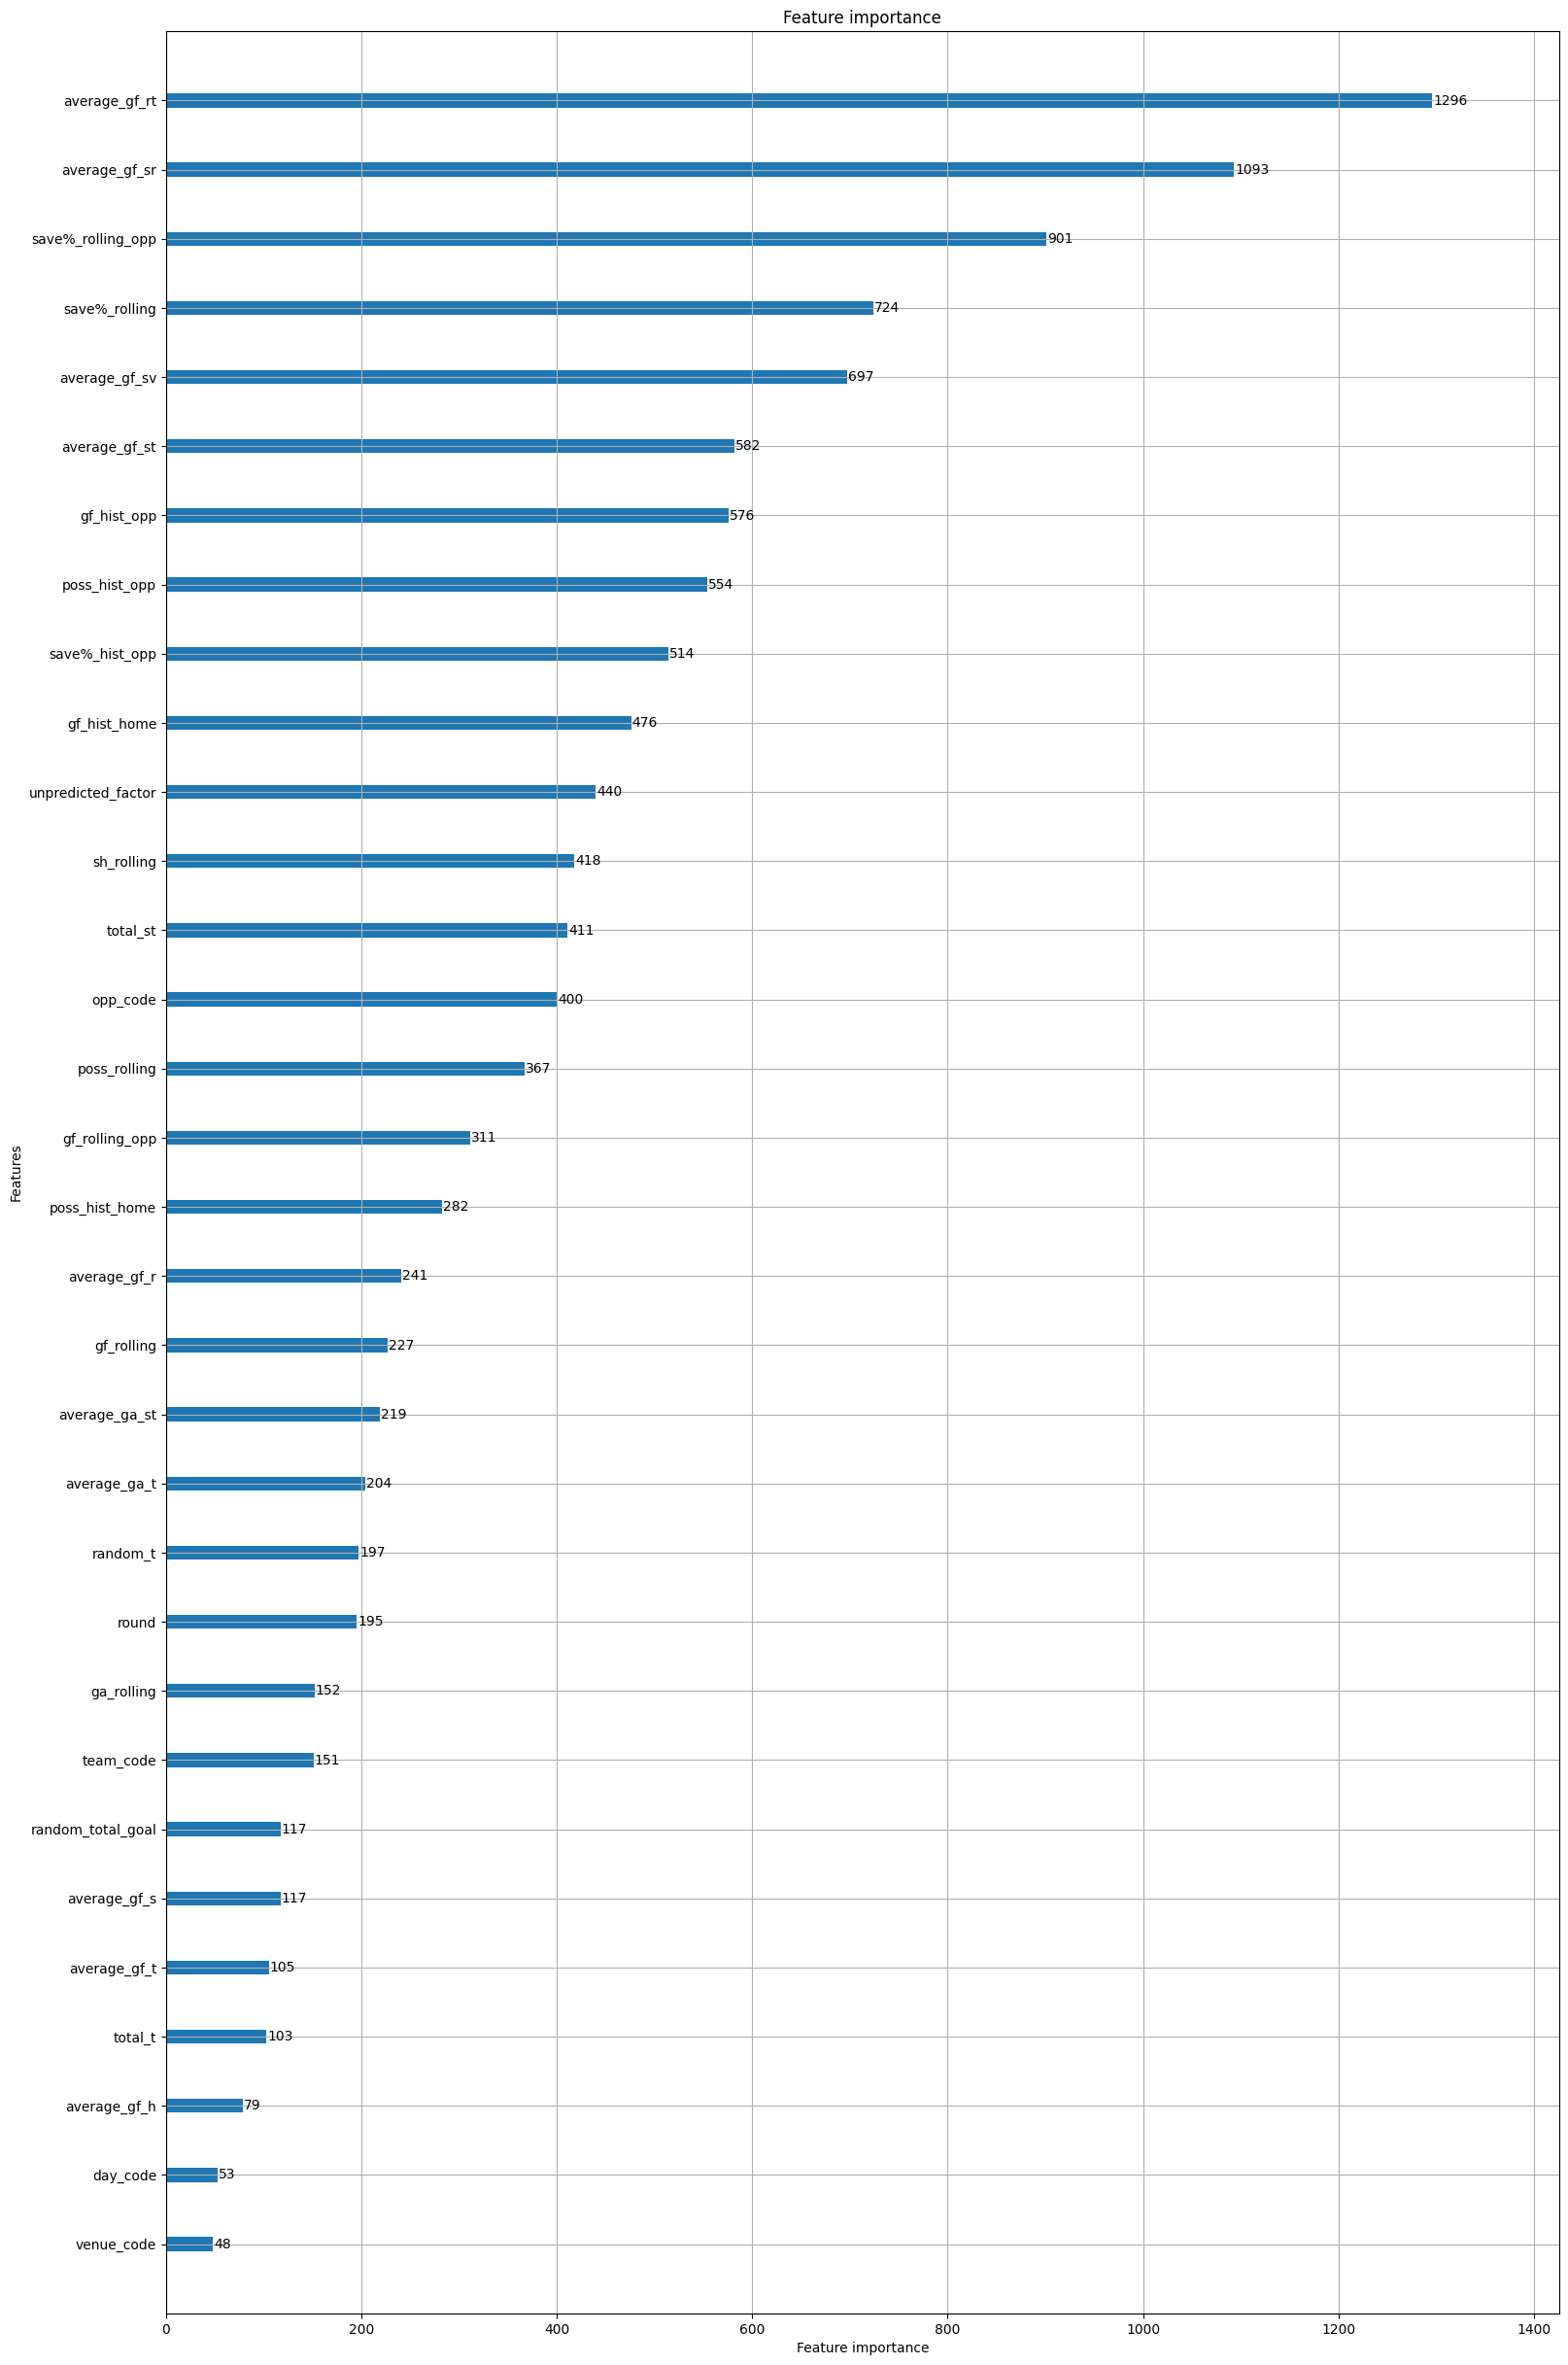

In [50]:
lgb.plot_importance(lgbm_regressor_all)
fig = plt.gcf()
fig.set_size_inches(18.5, 30.5)

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

All_team_clean = All_team.dropna()

X_train_clean = All_team_clean[:'2023-08-25'].drop('gf', axis=1)
y_train_clean = All_team_clean[:'2023-08-25'].gf
X_test_clean = All_team_clean['2023-08-25':].drop('gf', axis=1)
y_test_clean = All_team_clean['2023-08-25':].gf

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    #min_samples_split=2,
   # min_samples_leaf=1,
    #max_features='auto',  # You can experiment with different values
    random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Make predictions
predictions = rf_model.predict(X_test_clean)


In [52]:
mse = mean_squared_error(y_test_clean.values, predictions)
rmse = np.sqrt(mse)
rmse

1.0561317149462073

In [53]:
r2_score(y_test_clean.values, predictions)

0.28929863903002817

# Building machine learning for team Bayern Munich as an example

In [54]:
Bayern_Munich = Data[Data['team']=='Bayern Munich'].drop('team', axis=1)
Bayern_Munich['date'] = pd.to_datetime(Bayern_Munich['date'])
Bayern_Munich.set_index('date', inplace=True)
Bayern_Munich = Bayern_Munich.sort_index()
BM_train_X = Bayern_Munich[:'2023-08-27'].drop('gf', axis=1)
BM_train_y = Bayern_Munich[:'2023-08-27'].gf
BM_test_X = Bayern_Munich['2023-08-27':].drop('gf', axis=1)
BM_test_y = Bayern_Munich['2023-08-27':].gf

In [55]:
result = BM_test_X.copy()
# predict
result.loc[:, "test_predict"] = lgbm_regressor_all.predict(BM_test_X)
# actual result
result.loc[:, "Actual_Target"] = BM_test_y.values

train = BM_train_X.copy()
train.loc[:, "train_predict"] = lgbm_regressor_all.predict(BM_train_X)

LightGBMError: The number of features in data (25) is not the same as it was in training data (32).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [ ]:
result

In [ ]:
y_pred_BM = lgbm_regressor_all.predict(BM_test_X)
r2_value = r2_score(BM_test_y.values, y_pred_BM)
r2_value